## LBPH Accuracy on LFW

In [1]:
from src.FaceRecogniser.train_opencv_classifier import train_opencv_classifier
from src import Config
import os
from cv2.face import LBPHFaceRecognizer_create
from src.FaceRecogniser.recognise_lbp_hog import predict_lbph

In [2]:
N_train = 150
N_test = 100

In [3]:
filepaths = []
labels = []

for label in os.listdir(Config.LFW_PATH):
    folder_filenames = os.listdir(os.path.join(Config.LFW_PATH, label, 'extracted_faces'))
    folder_filepaths = [os.path.join(Config.LFW_PATH, label, 'extracted_faces', filename) for filename in folder_filenames]
    labels.extend([label] * len(folder_filepaths))
    filepaths.extend(folder_filepaths)

OpenCV will only accept integer labels.

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels_as_id = le.fit_transform(labels)

Shuffle the labels and filepaths without destroying their association.

In [5]:
import random
c = list(zip(filepaths, labels_as_id))
random.shuffle(c)
filepaths, labels_as_id = zip(*c)

Training dataset too large. Causes runtime > 20h.  
Thus, the total dataset size is reduced.

In [6]:
training_filepaths = filepaths[:N_train]
training_labels = labels_as_id[:N_train]

Test data must have a label in training data

In [7]:
test_filepaths, test_labels = zip(*[(filepaths[i], labels_as_id[i])  for i in range(80, len(filepaths)) if labels_as_id[i] in training_labels][:N_test])

Training

In [8]:
train_opencv_classifier(training_filepaths,
                            training_labels,
                            classifier = LBPHFaceRecognizer_create(),
                            training_path = '')

### Accuracy

In [9]:
%%time
predictions = []
for test_filepath in test_filepaths:
    pred, conf = predict_lbph(test_filepath, '')
    predictions.append(pred)


CPU times: user 25.3 s, sys: 1.15 s, total: 26.5 s
Wall time: 28.1 s


In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(predictions, test_labels)

0.79

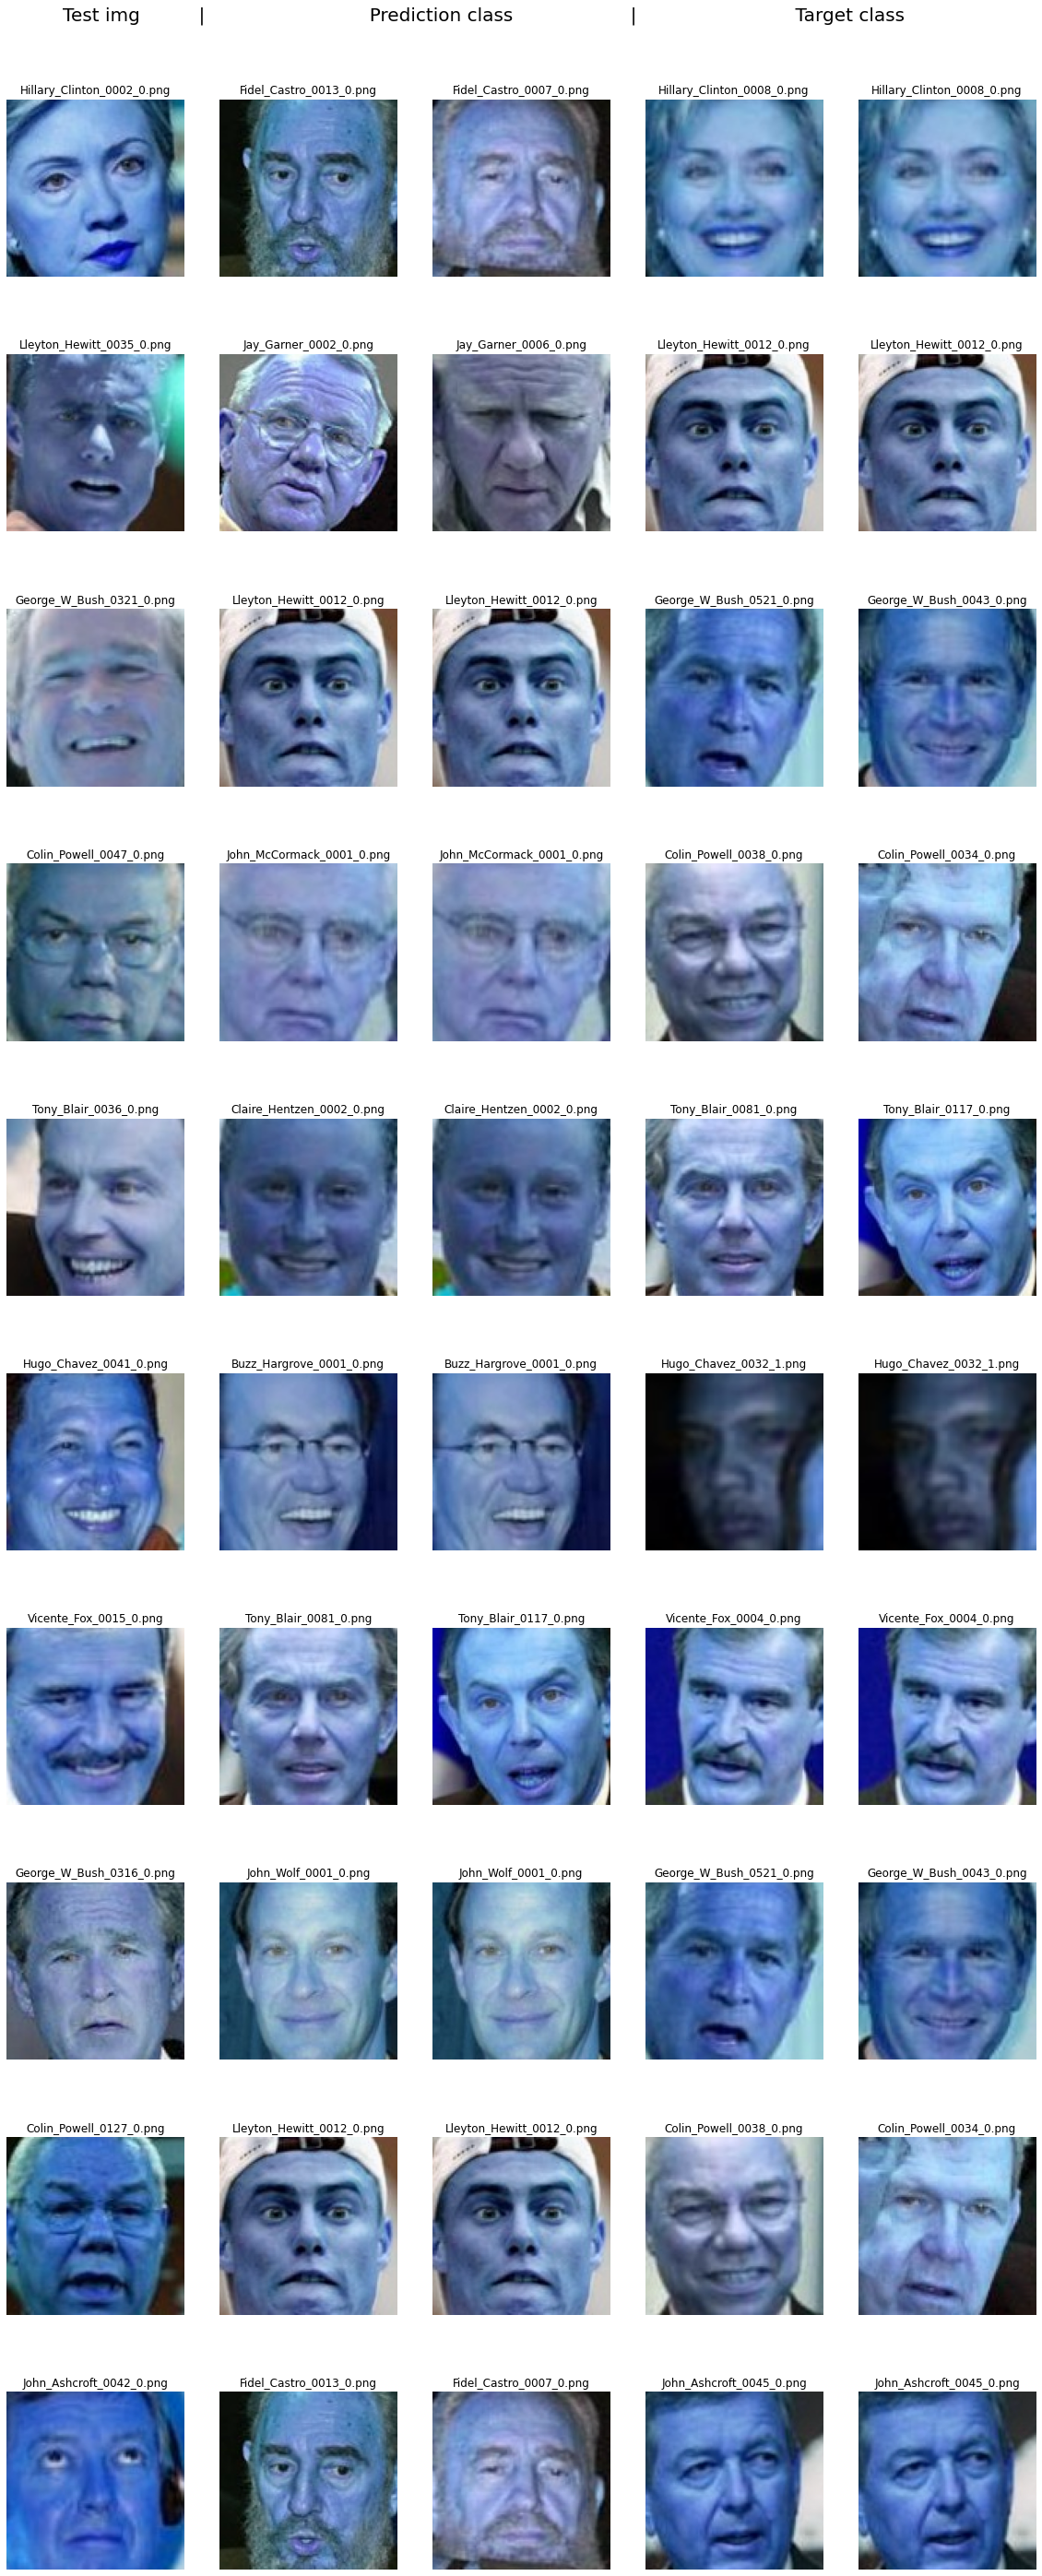

In [13]:
from src.Views.classification_error_view import classification_error_view
classification_error_view(predictions,
                              test_filepaths,
                              test_labels,
                              training_filepaths,
                              training_labels, 
                          'LBPH mistakes on LFW.png')